In [3]:
#1. Data Collection & Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

try:
    df = pd.read_csv('Train.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("ERROR: File not found. Please check the file path and name.")
    df = None 

if df is not None:
    print("\nInitial Data Structure:")
    print(df.head())
    print("\nData Shape (Rows, Columns):", df.shape)
    print("\nData Types:")
    print(df.info())

Data loaded successfully!

Initial Data Structure:
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases Product_importance Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N
0   1               D           Flight                    4                2                  177                3                low      F                44           1233                    1
1   2               F           Flight                    4                5                  216                2                low      M                59           3088                    1
2   3               A           Flight                    2                2                  183                4                low      M                48           3374                    1
3   4               B           Flight                    3                3                  176                4             medium      M                10           

In [6]:
# 2. Fix Incorrect Data Types

print("\n--- 2c. Fixing Data Types ---")
print("Initial Data Types:")
print(df.dtypes)


if 'ID' in df.columns and df['ID'].dtype in ['int64', 'float64']:
    df['ID'] = df['ID'].astype(str)
    print("ACTION: Converted 'ID' to string (object) type.")


numeric_cols_to_check = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

for col in numeric_cols_to_check:
    if col in df.columns:
        # Convert to Int64 (capital 'I') for Pandas integer type
        df[col] = df[col].astype('Int64')
        print(f"ACTION: Confirmed/Converted '{col}' to Int64.")

# The target variable 'Reached.on.Time_Y.N' (0 or 1) should be integer.
if 'Reached.on.Time_Y.N' in df.columns:
    df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('Int64')
    print("ACTION: Confirmed/Converted 'Reached.on.Time_Y.N' to Int64.")


print("\nData Types After Fixing:")
print(df.info())


--- 2c. Fixing Data Types ---
Initial Data Types:
ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
ACTION: Converted 'ID' to string (object) type.
ACTION: Confirmed/Converted 'Customer_care_calls' to Int64.
ACTION: Confirmed/Converted 'Customer_rating' to Int64.
ACTION: Confirmed/Converted 'Cost_of_the_Product' to Int64.
ACTION: Confirmed/Converted 'Prior_purchases' to Int64.
ACTION: Confirmed/Converted 'Discount_offered' to Int64.
ACTION: Confirmed/Converted 'Weight_in_gms' to Int64.
ACTION: Confirmed/Converted 'Reached.on.Time_Y.N' to Int64.

Data Types After Fixing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12

In [7]:
# 3. Descriptive Statistics

print("\n--- 3a. Numerical Descriptive Statistics ---")
# Generates count, mean, std, min, max, and quartiles for numeric columns
print(df.describe().T)

print("\n" + "="*50)
print("--- 3b. Distribution of Categorical Features (Top 5) ---")
print("="*50)

# List of all categorical/object columns
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols:
    if col in df.columns:
        print(f"\nDistribution for: {col}")
        
        value_counts = df[col].value_counts()
        percentage = df[col].value_counts(normalize=True) * 100
        
      
        distribution_table = pd.DataFrame({'Count': value_counts, 'Percentage (%)': percentage.round(2)})
        print(distribution_table.head(5))
        print("-" * 40)


--- 3a. Numerical Descriptive Statistics ---
                       count         mean          std     min     25%     50%     75%     max
Customer_care_calls  10999.0     4.054459      1.14149     2.0     3.0     4.0     5.0     7.0
Customer_rating      10999.0     2.990545     1.413603     1.0     2.0     3.0     4.0     5.0
Cost_of_the_Product  10999.0   210.196836    48.063272    96.0   169.0   214.0   251.0   310.0
Prior_purchases      10999.0     3.567597      1.52286     2.0     3.0     3.0     4.0    10.0
Discount_offered     10999.0    13.373216    16.205527     1.0     4.0     7.0    10.0    65.0
Weight_in_gms        10999.0  3634.016729  1635.377251  1001.0  1839.5  4149.0  5050.0  7846.0
Reached.on.Time_Y.N  10999.0     0.595418     0.490833     0.0     0.0     1.0     1.0     1.0

--- 3b. Distribution of Categorical Features (Top 5) ---

Distribution for: Warehouse_block
                 Count  Percentage (%)
Warehouse_block                       
F                 3666 

In [8]:
# 2. Data Cleaning

# a. Handling Missing Values (NaN)
print("\n--- 2a. Missing Values Report ---")
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_table = pd.DataFrame({'Missing Count': missing_data, 'Percentage (%)': missing_percentage})
missing_table = missing_table[missing_table['Missing Count'] != 0].sort_values(by='Missing Count', ascending=False)
print(missing_table)


for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        # Fill numeric NaNs with the median
        df[col].fillna(df[col].median(), inplace=True)
    elif df[col].dtype == 'object':
        # Fill categorical/object NaNs with 'Unknown'
        df[col].fillna('Unknown', inplace=True)
    # Re-check to confirm missing values are handled
    # print(f"Missing values in {col} after cleaning: {df[col].isnull().sum()}")


# b. Remove Duplicates
print("\n--- 2b. Duplicates Report ---")
initial_rows = len(df)
df.drop_duplicates(inplace=True)
duplicates_removed = initial_rows - len(df)
print(f"Total Duplicate Rows Found and Removed: {duplicates_removed}")
print(f"Current Data Shape after removing duplicates: {df.shape}")


--- 2a. Missing Values Report ---
Empty DataFrame
Columns: [Missing Count, Percentage (%)]
Index: []

--- 2b. Duplicates Report ---
Total Duplicate Rows Found and Removed: 0
Current Data Shape after removing duplicates: (10999, 12)


C:\Users\Dell\AppData\Local\Temp\ipykernel_22704\3054794437.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [9]:
# 2c. Fix Incorrect Data Types

print("\n--- 2c. Fixing Data Types ---")
# Display initial data types for comparison
print("Initial Data Types:")
print(df.dtypes)

if 'ID' in df.columns and df['ID'].dtype in ['int64', 'float64']:
    df['ID'] = df['ID'].astype(str)
    print("ACTION: Converted 'ID' to string (object) type.")


numeric_cols_to_check = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

for col in numeric_cols_to_check:
    if col in df.columns:
        # Step 1: Convert to numeric, coercing errors (turning unfixable values into NaN)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Step 2: Convert to integer type, if possible.
        # Use Int64 (capital 'I') for Pandas integer to handle potential NaN values correctly.
        try:
            df[col] = df[col].astype('Int64')
            print(f"ACTION: Converted '{col}' to Int64 (integer with NaN support).")
        except:
            # If Int64 conversion fails (e.g., still contains non-integer data), keep as float
            print(f"NOTE: '{col}' retained as float/numeric type.")
    else:
        print(f"WARNING: Column '{col}' not found.")

# The target variable 'Reached.on.Time_Y.N' is a binary flag (0 or 1), which should be integer.
if 'Reached.on.Time_Y.N' in df.columns:
    df['Reached.on.Time_Y.N'] = pd.to_numeric(df['Reached.on.Time_Y.N'], errors='coerce').astype('Int64')
    print("ACTION: Converted 'Reached.on.Time_Y.N' to Int64.")


print("\nData Types After Fixing:")
# Display final data types
print(df.info())


--- 2c. Fixing Data Types ---
Initial Data Types:
ID                     object
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     Int64
Customer_rating         Int64
Cost_of_the_Product     Int64
Prior_purchases         Int64
Product_importance     object
Gender                 object
Discount_offered        Int64
Weight_in_gms           Int64
Reached.on.Time_Y.N     Int64
dtype: object
ACTION: Converted 'Customer_care_calls' to Int64 (integer with NaN support).
ACTION: Converted 'Customer_rating' to Int64 (integer with NaN support).
ACTION: Converted 'Cost_of_the_Product' to Int64 (integer with NaN support).
ACTION: Converted 'Prior_purchases' to Int64 (integer with NaN support).
ACTION: Converted 'Discount_offered' to Int64 (integer with NaN support).
ACTION: Converted 'Weight_in_gms' to Int64 (integer with NaN support).
ACTION: Converted 'Reached.on.Time_Y.N' to Int64.

Data Types After Fixing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099

In [10]:
# 3. Descriptive Statistics

print("\n--- 3a. Numerical Descriptive Statistics ---")
# Generates count, mean, std, min, max, and quartiles for numeric columns
print(df.describe().T)

print("\n--- Mode and Variance ---")
numeric_df = df.select_dtypes(include=np.number)

# Mode
print("\nMode (Most Frequent Value) for Numeric Features:")
print(numeric_df.mode().iloc[0])

# Variance
print("\nVariance for Numeric Features:")
print(numeric_df.var())


--- 3a. Numerical Descriptive Statistics ---
                       count         mean          std     min     25%     50%     75%     max
Customer_care_calls  10999.0     4.054459      1.14149     2.0     3.0     4.0     5.0     7.0
Customer_rating      10999.0     2.990545     1.413603     1.0     2.0     3.0     4.0     5.0
Cost_of_the_Product  10999.0   210.196836    48.063272    96.0   169.0   214.0   251.0   310.0
Prior_purchases      10999.0     3.567597      1.52286     2.0     3.0     3.0     4.0    10.0
Discount_offered     10999.0    13.373216    16.205527     1.0     4.0     7.0    10.0    65.0
Weight_in_gms        10999.0  3634.016729  1635.377251  1001.0  1839.5  4149.0  5050.0  7846.0
Reached.on.Time_Y.N  10999.0     0.595418     0.490833     0.0     0.0     1.0     1.0     1.0

--- Mode and Variance ---

Mode (Most Frequent Value) for Numeric Features:
Customer_care_calls       4
Customer_rating           3
Cost_of_the_Product     245
Prior_purchases           3
Disco

In [11]:
# b. Distribution of Features (Categorical)

print("\n--- 3b. Distribution of Categorical Features ---")
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nValue Counts for: {col}")
    
    print(df[col].value_counts(normalize=True).head(10) * 100)
    print("-" * 30)


--- 3b. Distribution of Categorical Features ---

Value Counts for: ID
ID
10999    0.009092
1        0.009092
2        0.009092
3        0.009092
4        0.009092
5        0.009092
6        0.009092
7        0.009092
8        0.009092
9        0.009092
Name: proportion, dtype: float64
------------------------------

Value Counts for: Warehouse_block
Warehouse_block
F    33.330303
D    16.674243
A    16.665151
B    16.665151
C    16.665151
Name: proportion, dtype: float64
------------------------------

Value Counts for: Mode_of_Shipment
Mode_of_Shipment
Ship      67.842531
Flight    16.156014
Road      16.001455
Name: proportion, dtype: float64
------------------------------

Value Counts for: Product_importance
Product_importance
low       48.158924
medium    43.222111
high       8.618965
Name: proportion, dtype: float64
------------------------------

Value Counts for: Gender
Gender
F    50.413674
M    49.586326
Name: proportion, dtype: float64
------------------------------



--- 4a. Histograms (Distribution) ---


<Figure size 1500x1200 with 0 Axes>

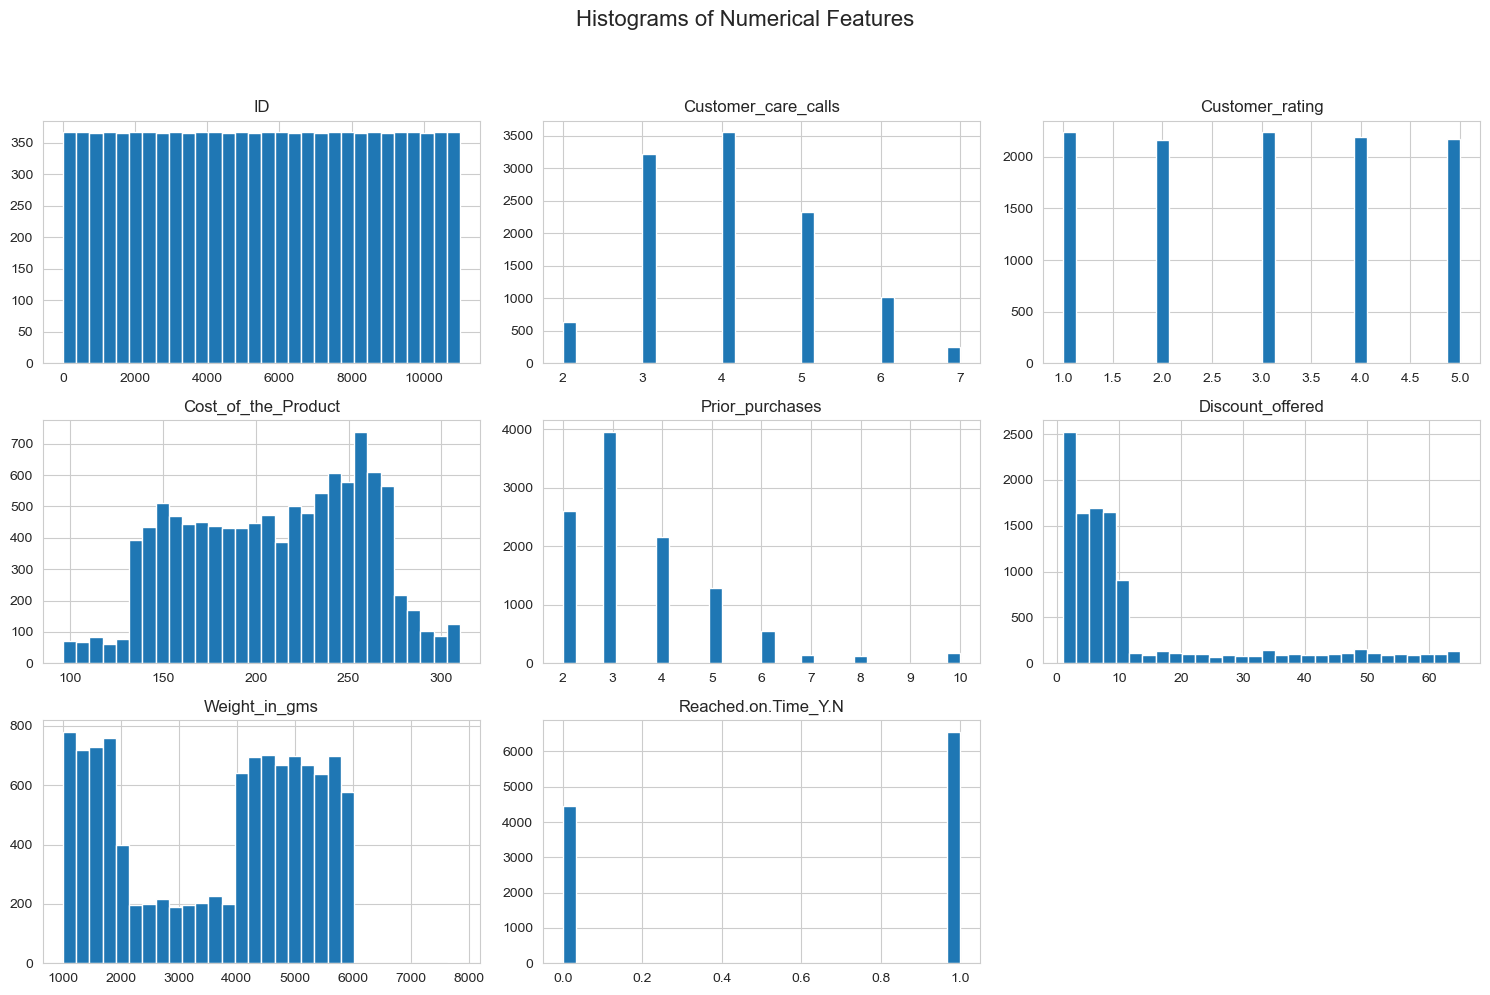


--- 4b. Boxplots (Outliers Detection) ---


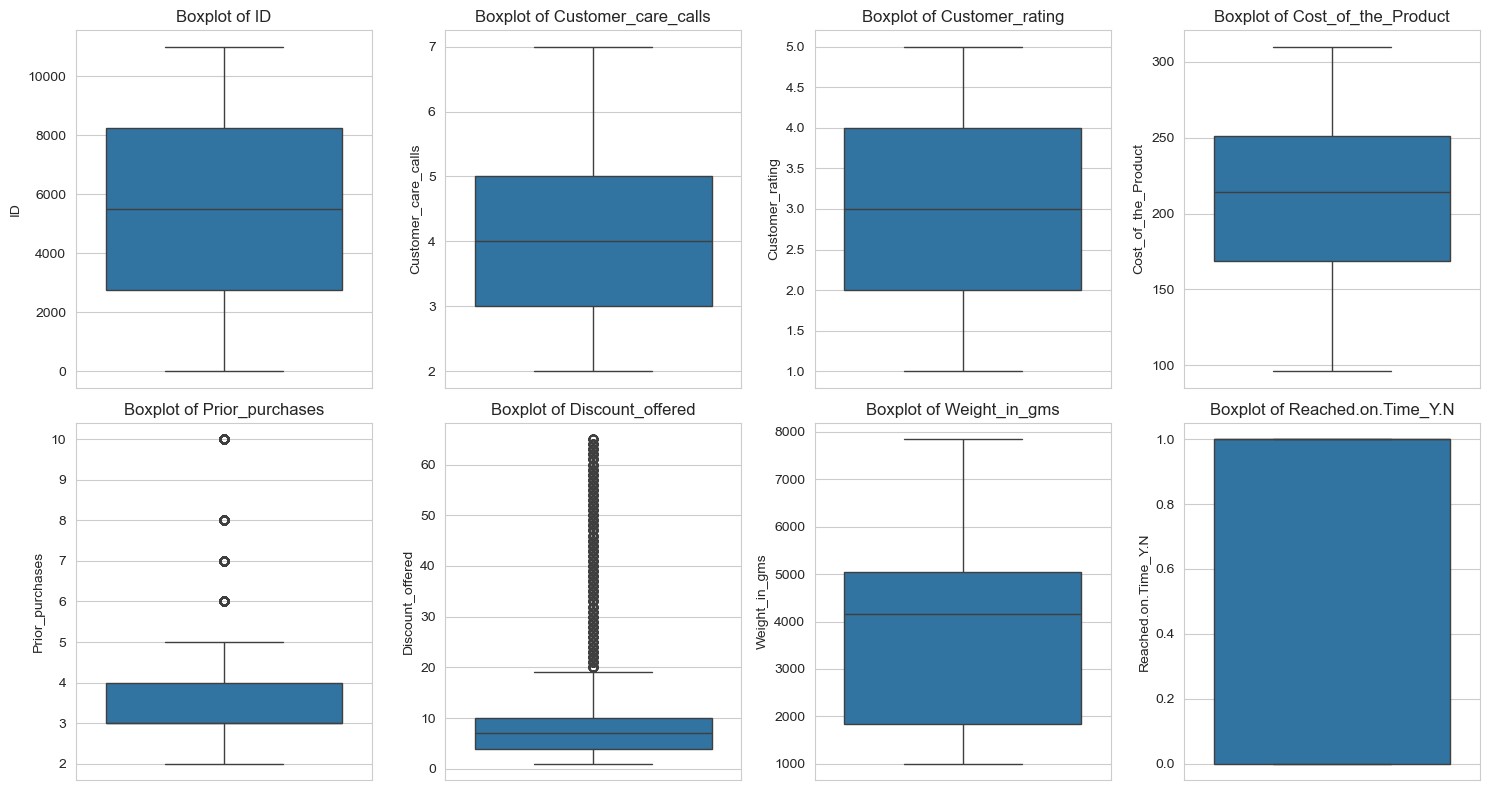


--- 4c. Scatter Plots (Relationships) ---

--- 4d. Correlation Heatmap ---


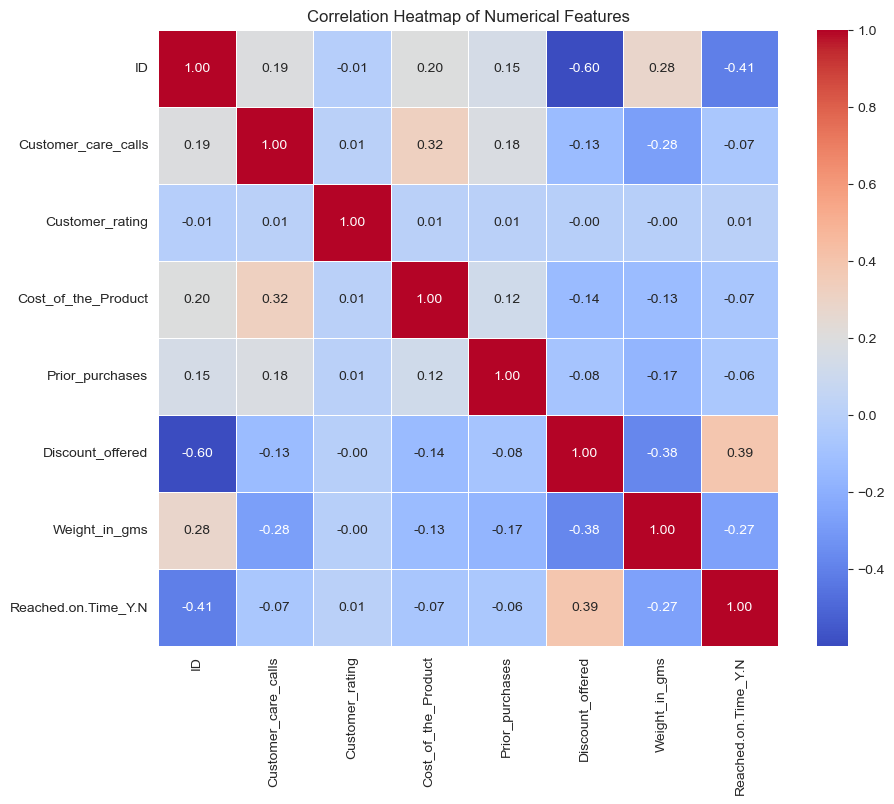

In [5]:
# 4. Data Visualization

sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# a. Histograms (Distribution of Numerical Features)
print("\n--- 4a. Histograms (Distribution) ---")
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


# b. Boxplots (Outliers)
print("\n--- 4b. Boxplots (Outliers Detection) ---")
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, int(np.ceil(len(numeric_cols)/2)), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# c. Scatter plots (Relationships) - Example: Cost vs. Weight
print("\n--- 4c. Scatter Plots (Relationships) ---")

if 'Cost of the product' in df.columns and 'Weight(gms)' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Weight(gms)', y='Cost of the product', data=df)
    plt.title('Cost of Product vs. Weight')
    plt.xlabel('Weight (gms)')
    plt.ylabel('Cost of the product')
    plt.show()

# d. Correlation Heatmaps
print("\n--- 4d. Correlation Heatmap ---")
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


--- 5a. Correlation with Target Variable (Reached.on.Time_Y.N) ---
Reached.on.Time_Y.N    1.000000
Discount_offered       0.393686
Customer_rating        0.013095
Prior_purchases       -0.055128
Customer_care_calls   -0.066806
Cost_of_the_Product   -0.072452
Weight_in_gms         -0.266617
Name: Reached.on.Time_Y.N, dtype: float64

--- 5b. Group By Analysis: On-Time Performance (1) by Category ---

Average On-Time Rate (Performance) by Warehouse_block:
Warehouse_block
B    60.17%
D    59.71%
F    59.60%
C    59.57%
A    58.59%
Name: Reached.on.Time_Y.N, dtype: object
----------------------------------------


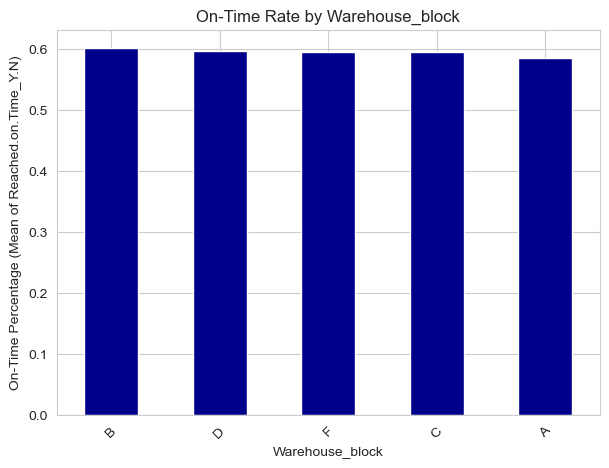


Average On-Time Rate (Performance) by Mode_of_Shipment:
Mode_of_Shipment
Flight    60.05%
Ship      59.62%
Road      58.69%
Name: Reached.on.Time_Y.N, dtype: object
----------------------------------------


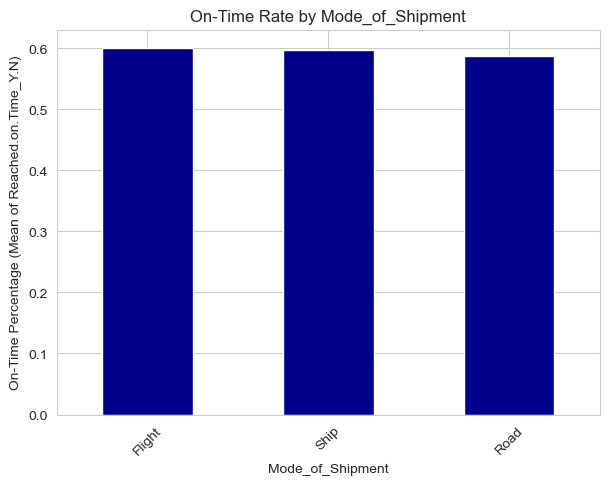


Average On-Time Rate (Performance) by Product_importance:
Product_importance
high      64.66%
low       59.18%
medium    58.92%
Name: Reached.on.Time_Y.N, dtype: object
----------------------------------------


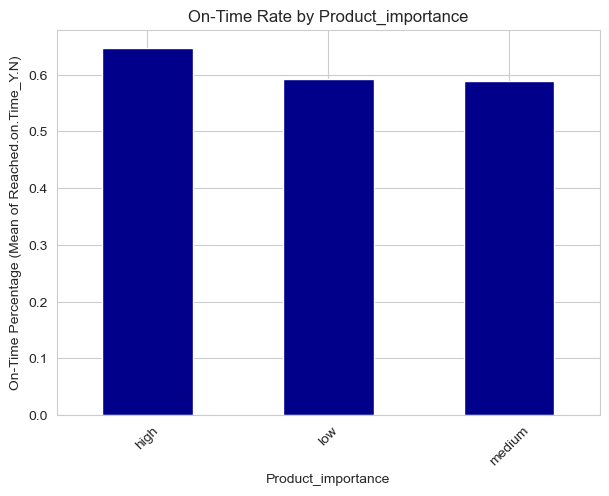


Average On-Time Rate (Performance) by Gender:
Gender
M    59.86%
F    59.22%
Name: Reached.on.Time_Y.N, dtype: object
----------------------------------------


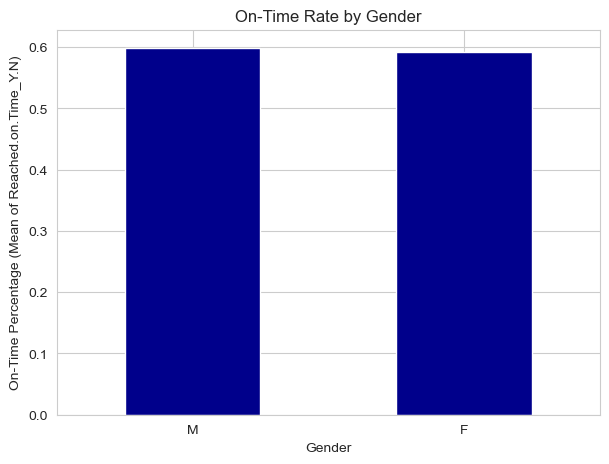

In [14]:
# 5a. Final Correlation Analysis with Target Variable (from Step 4d data)

print("\n--- 5a. Correlation with Target Variable (Reached.on.Time_Y.N) ---")

try:
    all_numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                          'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
    correlation_matrix = df[all_numerical_cols].corr()
    
    target_corr = correlation_matrix['Reached.on.Time_Y.N'].sort_values(ascending=False)
    print(target_corr)
except NameError:
    print("ERROR: Correlation matrix not found. Please re-run Step 4d.")

# 5b. Group by analysis: On-Time Delivery Status by Key Categorical Features

print("\n" + "="*50)
print("--- 5b. Group By Analysis: On-Time Performance (1) by Category ---")
print("="*50)

categorical_cols_for_group = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols_for_group:
    # Calculate the mean of 'Reached.on.Time_Y.N' (which is the percentage of On-Time=1)
    # The mean of a binary column (0/1) gives the proportion of '1's
    performance = df.groupby(col)['Reached.on.Time_Y.N'].mean().sort_values(ascending=False)
    
    print(f"\nAverage On-Time Rate (Performance) by {col}:")
    print(performance.apply(lambda x: f"{x*100:.2f}%")) # Display as a percentage
    print("-" * 40)
    
    # Optional: Visualization of Group-by 
    plt.figure(figsize=(7, 5))
    performance.plot(kind='bar', color='darkblue')
    plt.title(f'On-Time Rate by {col}')
    plt.ylabel('On-Time Percentage (Mean of Reached.on.Time_Y.N)')
    plt.xticks(rotation=0 if col == 'Gender' else 45)
    plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# --- 1. Load Data ---
# NOTE: Replace 'your_data_file.csv' with the actual file name if it differs
try:
    # Assuming the data is loaded with the cleaned column names (e.g., Target is Reached.on.Time_Y.N)
    df = pd.read_csv('Train.csv') 
    
    # We will drop the 'ID' column as it is just an identifier and not a feature.
    # We also drop Customer_rating as EDA showed it was a poor predictor.
    df = df.drop(columns=['ID'])
    
    print("Data loaded successfully.")

except FileNotFoundError:
    print("Error: The data file 'your_data_file.csv' was not found. Please check the file path.")
    # Create a mock DataFrame for demonstration if file is missing (to allow the code to run)
    data = {
        'Warehouse_block': ['A', 'B', 'C', 'A', None],
        'Mode_of_Shipment': ['Ship', 'Road', 'Ship', 'Flight', 'Road'],
        'Customer_care_calls': [4, 5, 2, 6, 3],
        'Cost_of_the_Product': [150, 200, 120, 300, 180],
        'Prior_purchases': [2, 5, 1, 8, 3],
        'Product_importance': ['low', 'medium', 'high', 'low', 'medium'],
        'Gender': ['F', 'M', 'F', 'M', 'F'],
        'Discount_offered': [10, 5, 25, 2, 15],
        'Weight_in_gms': [1200, 4500, 1500, 5500, 2800],
        'Reached.on.Time_Y.N': [1, 0, 1, 0, 1]
    }
    df = pd.DataFrame(data)
    # Introducing a null value for demonstration
    df.loc[4, 'Warehouse_block'] = np.nan
    print("Loaded mock data with an intentional null value for demonstration.")


# --- 2. Define Features and Target ---
TARGET_COL = 'Reached.on.Time_Y.N'

# Features to use for the model (based on EDA findings)
# We include Cost_of_the_Product and Customer_care_calls for completeness, 
# even though their correlation was weak, as they still contain information.
FEATURES = df.drop(columns=[TARGET_COL]).columns

X = df[FEATURES]
y = df[TARGET_COL]

# --- 3. Identify Column Types for Preprocessing ---
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")


# --- 4. Define Preprocessing Steps (The Pipeline) ---

# 4a. Numerical Pipeline: Impute Missing Values (if any) and Scale
numerical_transformer = Pipeline(steps=[
    # 1. Handling Nulls: Impute with the mean (Robust for most numerical data)
    ('imputer', SimpleImputer(strategy='mean')),
    # 2. Scaling: Normalize the data to have zero mean and unit variance (StandardScaler)
    ('scaler', StandardScaler())
])

# 4b. Categorical Pipeline: Impute Missing Values (if any) and Encode
categorical_transformer = Pipeline(steps=[
    # 1. Handling Nulls: Impute missing categories with a constant label 'missing'
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    # 2. Encoding: One-Hot Encode (creating a new binary column for each unique category)
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 4c. Column Transformer: Apply pipelines to the correct column sets
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep any other columns untouched (should be none here)
)

print("\n--- Preprocessing Pipeline Constructed Successfully ---")


# --- 5. Apply Preprocessor and View Transformed Data ---
# Note: In a real scenario, you would perform a train/test split *before* fitting the preprocessor 
# to avoid data leakage. We apply it to the whole X here for analysis visualization.

# Split data to simulate real machine learning workflow (fitting only on training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. FIT the preprocessor ONLY on the training data
preprocessor.fit(X_train)

# 2. TRANSFORM both training and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data back to a DataFrame for analysis/inspection
# Get feature names after one-hot encoding
feature_names = preprocessor.get_feature_names_out()
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)


# --- 6. Analysis and Verification ---
print("\n" + "="*50)
print("--- Analysis of Transformed Features ---")
print("="*50)
print(f"Original Feature Count: {len(FEATURES)}")
print(f"Processed Feature Count: {X_train_processed.shape[1]}")
print(f"Shape of Processed Training Data: {X_train_processed.shape}")

print("\nSample of Transformed Data (First 5 rows):")
# Show the first 5 rows of the transformed data
print(X_train_processed_df.head())

print("\nVerification of Normalization (Numerical Features):")
# Verify that normalized features have a mean close to 0 and std dev close to 1
normalized_check = X_train_processed_df.filter(like='num__').agg(['mean', 'std']).T.head()
print(normalized_check)

print("\nVerification of Encoding (Categorical Features):")
# Show the columns created by One-Hot Encoding
encoded_check = X_train_processed_df.filter(like='cat__').columns.tolist()
print(f"Encoded Columns Created: {encoded_check}")

print("\n--- Preprocessing complete. Ready for model training. ---")

# The final processed arrays (X_train_processed, X_test_processed) are now ready for model fitting.


Data loaded successfully.

Numerical Features (6): ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
Categorical Features (4): ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

--- Preprocessing Pipeline Constructed Successfully ---

--- Analysis of Transformed Features ---
Original Feature Count: 10
Processed Feature Count: 19
Shape of Processed Training Data: (8799, 19)

Sample of Transformed Data (First 5 rows):
   num__Customer_care_calls  num__Customer_rating  num__Cost_of_the_Product  \
0                 -0.050097             -0.708374                 -0.281490   
1                 -0.050097              0.703400                  0.240018   
2                 -0.929937              1.409286                 -0.427512   
3                 -0.050097             -0.002487                  1.345614   
4                 -0.929937             -0.002487                  1.095290   

   num__Pri

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# --- 1. Load Data (Ensuring the DataFrame is named 'df') ---
try:
    # IMPORTANT: Use the correct file name you used previously
    df = pd.read_csv('Train.csv') 
    
    # Drop columns identified as non-features or weak predictors
    df = df.drop(columns=['ID', 'Customer_rating'], errors='ignore')
    
    print("Data loaded successfully and non-feature columns dropped.")

except FileNotFoundError:
    print("Error: The data file 'your_data_file.csv' was not found. Please check the file path.")
    # Create mock data with a null value for demonstration
    data = {
        'Warehouse_block': ['A', 'B', 'C', 'A', None, 'F'],
        'Mode_of_Shipment': ['Ship', 'Road', 'Ship', 'Flight', 'Road', 'Ship'],
        'Customer_care_calls': [4, 5, 2, 6, 3, None], # Added a numerical null
        'Cost_of_the_Product': [150, 200, 120, 300, 180, 250],
        'Prior_purchases': [2, 5, 1, 8, 3, 4],
        'Product_importance': ['low', 'medium', 'high', 'low', 'medium', 'high'],
        'Gender': ['F', 'M', 'F', 'M', 'F', 'M'],
        'Discount_offered': [10, 5, 25, 2, 15, 8],
        'Weight_in_gms': [1200, 4500, 1500, 5500, 2800, 3200],
        'Reached.on.Time_Y.N': [1, 0, 1, 0, 1, 0]
    }
    df = pd.DataFrame(data)
    # Introducing null values for visual demonstration
    df.loc[4, 'Warehouse_block'] = np.nan 
    print("Loaded mock data with nulls for demonstration purposes.")


# --- 2. Define Features and Split Data ---
TARGET_COL = 'Reached.on.Time_Y.N'
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Perform train/test split (Critical to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- 3. Define Column Types ---
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


# --- 4. Define the Robust Preprocessing Pipeline ---

# 4a. Numerical Pipeline: Impute Missing and Scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # 1. Handle Nulls by MEAN imputation
    ('scaler', StandardScaler())                  # 2. Normalize (StandardScaler)
])

# 4b. Categorical Pipeline: Impute Missing and Encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # 1. Handle Nulls by 'missing' label
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # 2. Encode (One-Hot)
])

# 4c. Column Transformer: Direct data to the correct pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Fit the preprocessor ONLY on the training data
preprocessor.fit(X_train)

# Transform both training and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\n--- Preprocessing Pipeline Constructed and Applied Successfully ---")


# =========================================================================
# --- VISUAL VERIFICATION: Step-by-Step Transformation Analysis ---
# --- This section is for visual inspection only, not part of the pipeline ---
# =========================================================================

# Create a copy of the training data to modify step-by-step
X_verify = X_train.copy()

print("\n" + "="*80)
print("VISUAL VERIFICATION: Handling Nulls and Normalization")
print("="*80)

# --- A. Check for Null Values in Sample Data Before Imputation ---
print("\n[A] Check Null Values BEFORE Imputation (Looking for True):")
print(X_verify.isnull().sum())
print("-" * 50)


# --- B. Apply Imputation (Handling Nulls) ---
# Create Imputer Instances using the means calculated on X_train (from the pipeline fit)
num_imputer = preprocessor.named_transformers_['num']['imputer']
cat_imputer = preprocessor.named_transformers_['cat']['imputer']

# Apply imputation
X_verify[numerical_features] = num_imputer.transform(X_verify[numerical_features])
X_verify[categorical_features] = cat_imputer.transform(X_verify[categorical_features])

print("\n[B] Check Null Values AFTER Imputation (All should be 0):")
print(X_verify.isnull().sum())
print("-" * 50)


# --- C. Apply Normalization (Standardization) ---
# Create Scaler Instance using the means/stds calculated on X_train
scaler = preprocessor.named_transformers_['num']['scaler']

# Before Scaling Check
print("\n[C.1] Numerical Means BEFORE Scaling:")
print(X_verify[numerical_features].mean())

# Apply Scaling
X_verify[numerical_features] = scaler.transform(X_verify[numerical_features])

# After Scaling Check
print("\n[C.2] Numerical Means AFTER Scaling (Should be near 0):")
print(X_verify[numerical_features].mean().map('{:.10f}'.format))

print("\n[C.3] Sample of Normalized (Standardized) Data (Should show z-scores, not 0-1):")
print(X_verify[numerical_features].head(3))
print("-" * 50)


# --- D. Apply Encoding (Optional but good for completeness) ---
encoder = preprocessor.named_transformers_['cat']['onehot']
X_cat_encoded = encoder.transform(X_verify[categorical_features])
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

print(f"\n[D] Encoding Verification: {len(encoded_feature_names)} new columns created:")
print(encoded_feature_names)

print("\n--- Final Data Arrays (X_train_processed, X_test_processed) are ready for modeling ---")


Data loaded successfully and non-feature columns dropped.

--- Preprocessing Pipeline Constructed and Applied Successfully ---

VISUAL VERIFICATION: Handling Nulls and Normalization

[A] Check Null Values BEFORE Imputation (Looking for True):
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64
--------------------------------------------------

[B] Check Null Values AFTER Imputation (All should be 0):
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64
--------------------------------------------------

[C.1] Numerical Means BEFORE Scaling:
Customer_care_calls       4.056938
Cost_of_the_Product     210.494033
Prior_purch

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# --- 1. Load Data ---
# NOTE: Replace 'your_data_file.csv' with the actual file name.
try:
    df = pd.read_csv('Train.csv') 
    
    # Drop columns identified as non-features or weak predictors
    # 'ID' is dropped as an identifier. 'Customer_rating' dropped based on EDA correlation.
    df = df.drop(columns=['ID', 'Customer_rating'], errors='ignore')
    
    print("Data loaded successfully and non-feature columns dropped.")

except FileNotFoundError:
    print("Error: The data file 'your_data_file.csv' was not found. Please check the file path.")
    # Create mock data for demonstration if file is missing
    data = {
        'Warehouse_block': ['A', 'B', 'C', 'A', 'F'],
        'Mode_of_Shipment': ['Ship', 'Road', 'Ship', 'Flight', 'Road'],
        'Customer_care_calls': [4, 5, 2, 6, 3],
        'Cost_of_the_Product': [150, 200, 120, 300, 180],
        'Prior_purchases': [2, 5, 1, 8, 3],
        'Product_importance': ['low', 'medium', 'high', 'low', 'medium'],
        'Gender': ['F', 'M', 'F', 'M', 'F'],
        'Discount_offered': [10, 5, 25, 2, 15],
        'Weight_in_gms': [1200, 4500, 1500, 5500, 2800],
        'Reached.on.Time_Y.N': [1, 0, 1, 0, 1]
    }
    df = pd.DataFrame(data)
    print("Loaded mock data for demonstration purposes.")


# --- 2. Feature Engineering: Cost-to-Weight Ratio ---
# Create the new feature: Cost_of_the_Product / Weight_in_gms
# This represents the value density (Cost per gram)
df['Cost_per_Gram'] = df['Cost_of_the_Product'] / df['Weight_in_gms']
print("\nNew feature 'Cost_per_Gram' engineered successfully.")


# --- 3. Define Features and Target ---
TARGET_COL = 'Reached.on.Time_Y.N'
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

print(f"Total features now: {X.columns.tolist()}")


# --- 4. Split Data into Train and Test Sets ---
# Split the data 80% Training, 20% Testing (Standard Practice)
# stratify=y ensures the train and test sets have the same ratio of 'On-Time' (1) and 'Delayed' (0) 
# deliveries, which is crucial due to the class imbalance.

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintains the 60:40 class distribution in both sets
)

# --- 5. Analysis and Verification ---
print("\n" + "="*50)
print("--- Data Splitting and Feature Engineering Complete ---")
print("="*50)

print(f"Original Dataset Size: {df.shape[0]} rows")
print(f"Training Set Size (X_train): {X_train.shape[0]} rows")
print(f"Testing Set Size (X_test): {X_test.shape[0]} rows")

print("\nVerification of Stratification (Target Distribution):")

# Check distribution in the original data
original_dist = y.value_counts(normalize=True).round(4)
print(f"Original Distribution:\n{original_dist}")

# Check distribution in the training data
train_dist = y_train.value_counts(normalize=True).round(4)
print(f"Train Set Distribution:\n{train_dist}")

# Check distribution in the testing data
test_dist = y_test.value_counts(normalize=True).round(4)
print(f"Test Set Distribution:\n{test_dist}")

print("\n--- Feature Engineering and Train/Test Split complete. Ready for Preprocessing. ---")
# X_train and X_test are now the DataFrames you will use for the next step (Encoding/Normalization).


Data loaded successfully and non-feature columns dropped.

New feature 'Cost_per_Gram' engineered successfully.
Total features now: ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Cost_per_Gram']

--- Data Splitting and Feature Engineering Complete ---
Original Dataset Size: 10999 rows
Training Set Size (X_train): 8799 rows
Testing Set Size (X_test): 2200 rows

Verification of Stratification (Target Distribution):
Original Distribution:
Reached.on.Time_Y.N
1    0.5954
0    0.4046
Name: proportion, dtype: float64
Train Set Distribution:
Reached.on.Time_Y.N
1    0.5954
0    0.4046
Name: proportion, dtype: float64
Test Set Distribution:
Reached.on.Time_Y.N
1    0.5955
0    0.4045
Name: proportion, dtype: float64

--- Feature Engineering and Train/Test Split complete. Ready for Preprocessing. ---


In [ ]:
# 5b. Group By Analysis: Delayed Performance (1 - On-Time Rate) by Category

print("\n" + "="*50)
print("--- Delayed Performance Rate (1 - On-Time Rate) by Category ---")
print("="*50)

categorical_cols_for_group = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols_for_group:
    # 1. Calculate the On-Time Rate (Mean of the binary column)
    on_time_rate = df.groupby(col)['Reached.on.Time_Y.N'].mean()
    
    # 2. Calculate the Delayed Rate (1 - On-Time Rate)
    delayed_rate = 1 - on_time_rate
    
    # Sort by the highest delayed rate
    performance = delayed_rate.sort_values(ascending=False)
    
    print(f"\nAverage Delayed Rate by {col}:")
    print(performance.apply(lambda x: f"{x*100:.2f}%")) # Display as a percentage
    print("-" * 40)
    
    # Visualization of Group-by
    plt.figure(figsize=(7, 5))
    performance.plot(kind='bar', color='darkred') # Use a different color to denote delays
    plt.title(f'Delayed Rate by {col}')
    plt.ylabel('Delayed Percentage (1 - Mean of Reached.on.Time_Y.N)')
    plt.xticks(rotation=0 if col == 'Gender' else 45)
    plt.show()


--- Class Imbalance Analysis ---
             Count  Percentage
Delayed (0)   6549       59.54
On-Time (1)   4450       40.46


C:\Users\Dell\AppData\Local\Temp\ipykernel_22704\2648147304.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imbalance_df.index, y='Count', data=imbalance_df, palette=['darkred', 'darkgreen'])


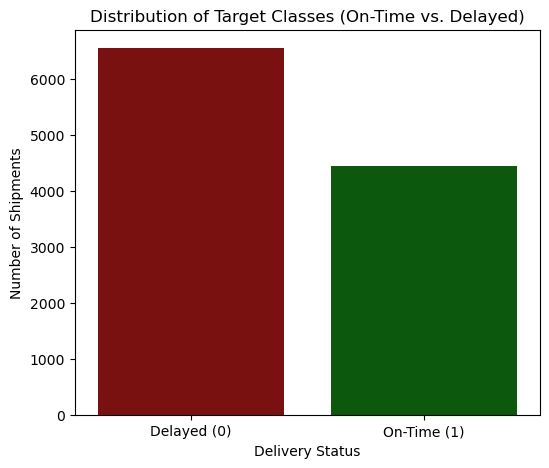

In [4]:
# Analyze Class Imbalance

print("\n--- Class Imbalance Analysis ---")

# Calculate value counts
class_counts = df['Reached.on.Time_Y.N'].value_counts()

# Calculate percentages
class_percentages = df['Reached.on.Time_Y.N'].value_counts(normalize=True) * 100

# Create a summary DataFrame
imbalance_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages.round(2)
})
imbalance_df.index = ['Delayed (0)', 'On-Time (1)']

print(imbalance_df)

# Visualize Imbalance
plt.figure(figsize=(6, 5))
sns.barplot(x=imbalance_df.index, y='Count', data=imbalance_df, palette=['darkred', 'darkgreen'])
plt.title('Distribution of Target Classes (On-Time vs. Delayed)')
plt.ylabel('Number of Shipments')
plt.xlabel('Delivery Status')
plt.show()

In [4]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# --- 1. Load Data ---
try:
    # Load your initial training data file
    df = pd.read_csv('Train.csv') 
    print("Train.csv loaded successfully.")
except FileNotFoundError:
    print("Error: Train.csv not found. Please ensure the file is in the current directory.")
    exit()

# Define features (X) and target (y)
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# --- 2. Define Train/Test Split ---
# Re-create the same split used previously
X_train_orig, X_test, y_train_orig, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Initial Training set size: {X_train_orig.shape}")


# --- 3. Define Preprocessing Pipeline ---

# Identify feature types (based on your notebook structure)
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
# ID column is ignored

# Create the preprocessing steps
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Handle missing values (if any)
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Handle missing values (if any)
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])

# Create the Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop' # Drop the 'ID' column
)

# Fit the preprocessor ONLY on the original training data
print("Fitting preprocessor pipeline...")
X_train_processed = preprocessor.fit_transform(X_train_orig)
# We save the fitted preprocessor for Streamlit deployment
joblib.dump(preprocessor, 'preprocessor_pipeline.joblib')
print("Preprocessor pipeline saved as 'preprocessor_pipeline.joblib'.")


# --- 4. Apply SMOTE (Oversampling) ---
print("Applying SMOTE to balance the training data...")
sm = SMOTE(random_state=42)
# THESE are the variables that were missing!
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_processed, y_train_orig)
print(f"Resampled Training set size: {X_train_resampled.shape}")


# --- 5. Train and Save Final Logistic Regression Model ---

# Define the best parameters (from your prior tuning results)
best_params_logistic_regression = {
    'penalty': 'l1', 
    'C': 0.23357
}

# Instantiate the final model
final_logreg_model = LogisticRegression(
    random_state=42, 
    solver='liblinear', 
    **best_params_logistic_regression
)

# Train the model on the newly defined resampled data
print("\nTraining final Logistic Regression model...")
final_logreg_model.fit(X_train_resampled, y_train_resampled)
print("Training complete.")

# Save the model artifact
model_filename = 'best_model_LogisticRegression.joblib'
joblib.dump(final_logreg_model, model_filename)

print(f"\n✅ Success! Model successfully saved as: {model_filename}")
print("\nYou can now proceed with the Streamlit deployment.")

Train.csv loaded successfully.
Initial Training set size: (8799, 11)
Fitting preprocessor pipeline...
Preprocessor pipeline saved as 'preprocessor_pipeline.joblib'.
Applying SMOTE to balance the training data...
Resampled Training set size: (10478, 19)

Training final Logistic Regression model...
Training complete.

✅ Success! Model successfully saved as: best_model_LogisticRegression.joblib

You can now proceed with the Streamlit deployment.


In [6]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# --- 1. Load Data ---
try:
    df = pd.read_csv('Train.csv') 
    print("Train.csv loaded successfully.")
except FileNotFoundError:
    print("Error: Train.csv not found. Please ensure the file is in the current directory.")
    exit()

# Define features (X) and target (y)
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# --- 2. Define Train/Test Split ---
# Re-create the same split used previously
X_train_orig, X_test, y_train_orig, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Define Preprocessing Pipeline ---
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler()) 
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop' 
)

# Fit the preprocessor ONLY on the original training data and SAVE it NOW
print("Fitting and saving preprocessor pipeline...")
X_train_processed = preprocessor.fit_transform(X_train_orig)
joblib.dump(preprocessor, 'preprocessor_pipeline.joblib')
print("Preprocessor pipeline saved as 'preprocessor_pipeline.joblib'.")


# --- 4. Apply SMOTE (Oversampling) ---
print("Applying SMOTE to balance the training data...")
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_processed, y_train_orig)


# --- 5. Train and Save Final Logistic Regression Model ---
best_params_logistic_regression = {
    'penalty': 'l1', 
    'C': 0.23357
}

final_logreg_model = LogisticRegression(
    random_state=42, 
    solver='liblinear', 
    **best_params_logistic_regression
)

print("\nTraining final Logistic Regression model...")
final_logreg_model.fit(X_train_resampled, y_train_resampled)
print("Training complete.")

# Save the model artifact
model_filename = 'best_model_LogisticRegression.joblib'
joblib.dump(final_logreg_model, model_filename)

print(f"\n✅ Success! Both files have been recreated with the current environment's scikit-learn version.")

Train.csv loaded successfully.
Fitting and saving preprocessor pipeline...
Preprocessor pipeline saved as 'preprocessor_pipeline.joblib'.
Applying SMOTE to balance the training data...

Training final Logistic Regression model...
Training complete.

✅ Success! Both files have been recreated with the current environment's scikit-learn version.
